In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import squarify

In [3]:
property = pd.read_excel('Property.xlsx')

In [6]:
property.columns

Index(['Row', 'PropID', 'Property Address', 'Property Name', 'Star Rating',
       'Energy Star', 'LEED Certified', 'Building Status', 'Secondary Type',
       'Market Name',
       ...
       '2024 Pop Age 75-79(1m)', '2024 Pop Age 80-84(1m)',
       '2024 Pop Age 85+(1m)', 'Situs_Num', 'Situs_Num_Remainder', 'SITUS_DIR',
       'SITUS_NAM', 'SCP', 'SCSitus_NumNam', 'SCAPN'],
      dtype='object', length=212)

In [15]:
prop = property[['PropID', 'Property Address', 'Property Name', 'Market Name', 'City', 'State', 'Zip', 'Number Of Units', 'Number Of 1 Bedrooms', 'Number Of 2 Bedrooms', 'Number Of 3 Bedrooms', 'Number Of 4 Bedrooms']]

In [16]:
prop.head(5)

,PropID,Property Address,Property Name,Market Name,City,State,Zip,Number Of Units,Number Of 1 Bedrooms,Number Of 2 Bedrooms,Number Of 3 Bedrooms,Number Of 4 Bedrooms
0,P1,6215 Johns Creek Cmn,The Reserve at Johns Creek Walk,Atlanta,Johns Creek,GA,300971535,210,75.0,98.0,37.0,NaN
1,P2,927 3rd St NW,8West,Atlanta,Atlanta,GA,30318,264,98.0,131.0,30.0,NaN
2,P3,555 NW 8th St,Eighth Street Apartments,Atlanta,Atlanta,GA,30318,200,NaN,50.0,50.0,100.0
3,P4,250 10th St NE,Post Parkside ATL,Atlanta,Atlanta,GA,303093735,188,85.0,42.0,NaN,NaN
4,P5,100 10th St NW,100 Midtown,Atlanta,Atlanta,GA,30309,118,NaN,72.0,NaN,46.0


In [13]:
georgia = pd.read_csv('Georgia_all_data.csv')

In [14]:
georgia = georgia[['SCAPN', 'PropID', 'City', 'County', 'Zip', 'Num_units', 'Num_studio', 'Num_1_bed', 'Num_2_bed','Num_3_bed', 'Num_4_bed', 'Price_per_sqft']]

In [15]:
georgia.head(3)

,SCAPN,PropID,City,County,Zip,Num_units,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft
0,GA Fulton 11-1000-0359-034,P1,Johns Creek,Fulton,300971535,210,NaN,75.0,98.0,37.0,NaN,180.16
1,GA Fulton 11-1000-0359-034,P1,Johns Creek,Fulton,300971535,210,NaN,75.0,98.0,37.0,NaN,142.98
2,GA Fulton 14-0112-0003-061-5,P2,Atlanta,Fulton,30318,264,5.0,98.0,131.0,30.0,NaN,NaN


In [16]:
studio_perc = georgia['Num_studio']/georgia['Num_units']

In [17]:
georgia.insert(6, 'percent_studio', studio_perc, True)

In [18]:
georgia.insert(6, 'percent_1', georgia['Num_1_bed']/georgia['Num_units'], True)
georgia.insert(6, 'percent_2', georgia['Num_2_bed']/georgia['Num_units'], True)
georgia.insert(6, 'percent_3', georgia['Num_3_bed']/georgia['Num_units'], True)
georgia.insert(6, 'percent_4', georgia['Num_4_bed']/georgia['Num_units'], True)

In [9]:
georgia.Num_units.value_counts().head(10)

100    108
200     88
120     80
240     75
300     53
144     45
152     43
192     43
250     40
112     40
Name: Num_units, dtype: int64

In [50]:
georgia.groupby('Num_units')['Price_per_sqft'].max().head(5)

Num_units
60            NaN
100        115.81
101         48.58
102    1720550.00
103    1720550.00
Name: Price_per_sqft, dtype: float64

In [55]:
georgia[georgia.Num_units == 103]

,SCAPN,PropID,City,County,Zip,Num_units,percent_4,percent_3,percent_2,percent_1,percent_studio,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,percent_studio
1512,GA Jackson 020-051,P1330,Commerce,Jackson,305297733,103,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,103.0,NaN,NaN,43.43,NaN
1513,GA Jackson 020-051,P1330,Commerce,Jackson,305297733,103,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,103.0,NaN,NaN,32.36,NaN
2409,GA Douglas 0182-03-6-0-007,P1928,Lithia Springs,Douglas,301221756,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1720550.00,NaN
2410,GA Douglas 0182-03-6-0-007,P1928,Lithia Springs,Douglas,301221756,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3248,GA Clarke 234D2-C-019,P2523,Athens,Clarke,30605,103,0.330097,0.495146,0.174757,NaN,NaN,NaN,NaN,18.0,51.0,34.0,NaN,NaN
3552,GA Chatham 2-0693-05-002,P2774,Savannah,Chatham,314192249,103,NaN,NaN,0.174757,0.708738,0.116505,12.0,73.0,18.0,NaN,NaN,38.33,0.116505


In [66]:
georgia[georgia.Price_per_sqft > 2000 ]

,SCAPN,PropID,City,County,Zip,Num_units,percent_4,percent_3,percent_2,percent_1,percent_studio,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,percent_studio
963,GA Walton LG10000000052A00,P889,Loganville,Walton,300527391,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000000.0,NaN
1669,GA Henry 074--01-024-000,P1446,Mcdonough,Henry,30253,489,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,489.0,NaN,2382.5,NaN
1719,GA Douglas 0182-03-6-0-007,P1483,Lithia Springs,Douglas,30122,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1720550.0,NaN
2409,GA Douglas 0182-03-6-0-007,P1928,Lithia Springs,Douglas,301221756,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1720550.0,NaN
2561,GA Cobb 20-0037-0-012-0,P2031,Acworth,Cobb,30101,225,NaN,NaN,1.0,NaN,NaN,NaN,NaN,225.0,NaN,NaN,1725000.0,NaN
2600,GA Clayton 12-0089D-00A-001,P2058,Stockbridge,Clayton,30281,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17140000.0,NaN
3149,GA Cherokee 015N05-00000-002-000-0000,P2436,Acworth,Cherokee,30102,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13300000.0,NaN
3251,GA Chatham 1-0470-02-003,P2526,Savannah,Chatham,31406,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,823757.0,NaN
3252,GA Chatham 1-0470-02-003,P2526,Savannah,Chatham,31406,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446700.0,NaN
3453,GA Chatham 1-0938-02-008,P2691,Savannah,Chatham,314051214,192,NaN,NaN,NaN,1.0,NaN,NaN,192.0,NaN,NaN,NaN,2250000.0,NaN


In [21]:
georgia[['percent_1', 'percent_2', 'percent_3', 'percent_4', 'percent_studio']].head(5)

,percent_1,percent_2,percent_3,percent_4,percent_studio
0,0.357143,0.466667,0.176190,NaN,NaN
1,0.357143,0.466667,0.176190,NaN,NaN
7,0.387597,NaN,NaN,NaN,0.612403
11,0.629442,0.172589,NaN,NaN,0.197970
14,0.143836,0.219178,0.232877,NaN,0.404110


In [11]:
georgia.insert(6, 'percent_studio', georgia['Num_studio']/georgia['Num_units'], True)

In [32]:
georgia = georgia[georgia.Price_per_sqft > 0]
georgia = georgia[georgia.Num_units > 0]
georgia = georgia[georgia.Price_per_sqft < 3000]

georgia.count()

SCAPN             1773
PropID            1773
City              1773
County            1773
Zip               1773
Num_units         1773
Category          1773
percent_4          158
percent_3         1264
percent_2         1721
percent_1         1523
percent_studio     128
Num_studio         128
Num_1_bed         1523
Num_2_bed         1721
Num_3_bed         1264
Num_4_bed          158
Price_per_sqft    1773
dtype: int64

In [ ]:
## this was a failure

##for n in np.arange(len(georgia)):
    if georgia.percent_1[n] > 0.5:
        georgia.insert(6, 'Category', 'Mainly 1', True)
    if georgia.percent_2[n] > 0.5:
        georgia.insert(6, 'Category', 'Mainly 2', True)
    if georgia.percent_3[n] > 0.5:
        georgia.insert(6, 'Category', 'Mainly 3', True)
    if georgia.percent_4[n] > 0.5:
        georgia.insert(6, 'Category', 'Mainly 4', True)
    if georgia.percent_studio[n] > 0.5:
        georgia.insert(6, 'Category', 'Mainly Studio', True)
    if (georgia.percent_studio[n] + georgia.percent_1[n]) > (georgia.percent_2[n] + georgia.percent_3[n]):
        georgia.insert(6, 'Category', 'Mainly Singles', True)
    if (georgia.percent_studio[n] + georgia.percent_1[n]) < (georgia.percent_2[n] + georgia.percent_3[n]):
        georgia.insert(6, 'Category', 'Mainly Families', True)
    else:
        georgia.insert(6, 'Category', 'Mixed', True)

In [26]:
georgia['Category'] = np.where((georgia['percent_1'] + georgia['percent_studio'])> (georgia['percent_2'] + georgia['percent_3']), 'Single', 'Family')


In [30]:
georgia = georgia.loc[:,~georgia.columns.duplicated()]
georgia.head(2)

,SCAPN,PropID,City,County,Zip,Num_units,Category,percent_4,percent_3,percent_2,percent_1,percent_studio,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft
0,GA Fulton 11-1000-0359-034,P1,Johns Creek,Fulton,300971535,210,Family,NaN,0.17619,0.466667,0.357143,NaN,NaN,75.0,98.0,37.0,NaN,180.16
1,GA Fulton 11-1000-0359-034,P1,Johns Creek,Fulton,300971535,210,Family,NaN,0.17619,0.466667,0.357143,NaN,NaN,75.0,98.0,37.0,NaN,142.98


In [33]:
georgia.groupby('Category')['Price_per_sqft'].mean()

Category
Family     71.768739
Single    140.471000
Name: Price_per_sqft, dtype: float64

In [41]:
georgia.Category.value_counts()

Family    1753
Single      20
Name: Category, dtype: int64

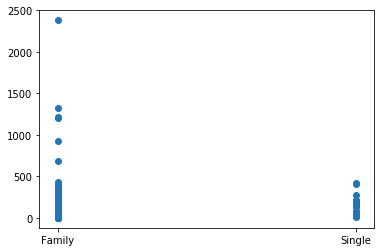

In [37]:
plt.show()

plt.scatter(georgia.Category, georgia.Price_per_sqft)

plt.show()

In [69]:
georgia['percent_4'].fillna(0, inplace=True)
georgia['percent_3'].fillna(0, inplace=True)
georgia['percent_2'].fillna(0, inplace=True)
georgia['percent_3'].fillna(0, inplace=True)
georgia['percent_studio'].fillna(0, inplace=True)
georgia = georgia.reset_index(drop=True)

georgia.head(5)

,SCAPN,PropID,City,County,Zip,Num_units,Category,percent_4,percent_3,percent_2,percent_1,percent_studio,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,unit_mix
0,GA Fulton 11-1000-0359-034,P1,Johns Creek,Fulton,300971535,210,Family,0.0,0.176190,0.466667,0.357143,0.000000,NaN,75.0,98.0,37.0,NaN,180.16,0
1,GA Fulton 11-1000-0359-034,P1,Johns Creek,Fulton,300971535,210,Family,0.0,0.176190,0.466667,0.357143,0.000000,NaN,75.0,98.0,37.0,NaN,142.98,0
2,GA Fulton 17-0106-0004-032-6,P7,Atlanta,Fulton,303093948,129,Family,0.0,0.000000,0.000000,0.387597,0.612403,79.0,50.0,NaN,NaN,NaN,4.62,0
3,GA Fulton 17-0150-0010-019,P11,Atlanta,Fulton,303185405,197,Family,0.0,0.000000,0.172589,0.629442,0.197970,39.0,124.0,34.0,NaN,NaN,104.58,0
4,GA Fulton 17-0108-0001-077-2,P14,Atlanta,Fulton,303631073,146,Single,0.0,0.232877,0.219178,0.143836,0.404110,59.0,21.0,32.0,34.0,NaN,421.46,0


In [70]:
def is_category(unit_mix):  
    if georgia.percent_1[unit_mix] > 0.45:
        return 'Mainly 1'
    elif georgia.percent_2[unit_mix] > 0.45:
        return 'Mainly 2'
    elif georgia.percent_3[unit_mix] > 0.45:
        return 'Mainly 3'
    elif georgia.percent_4[unit_mix] > 0.45:
        return 'Mainly 4'
    elif georgia.percent_studio[unit_mix] > 0.45:
        return 'Mainly Studio'
    else:
        return 'Mixed'

In [74]:
is_category(2)

'Mainly Studio'

In [76]:
georgia['unit_mix'] = np.arange(len(georgia))

In [79]:
georgia['unit_mix'] = georgia['unit_mix'].apply(is_category)
georgia.head()

,SCAPN,PropID,City,County,Zip,Num_units,Category,percent_4,percent_3,percent_2,percent_1,percent_studio,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft,unit_mix
0,GA Fulton 11-1000-0359-034,P1,Johns Creek,Fulton,300971535,210,Family,0.0,0.176190,0.466667,0.357143,0.000000,NaN,75.0,98.0,37.0,NaN,180.16,Mainly 2
1,GA Fulton 11-1000-0359-034,P1,Johns Creek,Fulton,300971535,210,Family,0.0,0.176190,0.466667,0.357143,0.000000,NaN,75.0,98.0,37.0,NaN,142.98,Mainly 2
2,GA Fulton 17-0106-0004-032-6,P7,Atlanta,Fulton,303093948,129,Family,0.0,0.000000,0.000000,0.387597,0.612403,79.0,50.0,NaN,NaN,NaN,4.62,Mainly Studio
3,GA Fulton 17-0150-0010-019,P11,Atlanta,Fulton,303185405,197,Family,0.0,0.000000,0.172589,0.629442,0.197970,39.0,124.0,34.0,NaN,NaN,104.58,Mainly 1
4,GA Fulton 17-0108-0001-077-2,P14,Atlanta,Fulton,303631073,146,Single,0.0,0.232877,0.219178,0.143836,0.404110,59.0,21.0,32.0,34.0,NaN,421.46,Mixed


In [80]:
georgia.groupby('unit_mix')['Price_per_sqft'].mean()

unit_mix
Mainly 1          93.884656
Mainly 2          62.781218
Mainly 3         114.832500
Mainly 4          82.325500
Mainly Studio     20.910000
Mixed             68.201675
Name: Price_per_sqft, dtype: float64

In [252]:
one_bed = georgia.Price_per_sqft[georgia.unit_mix == 'Mainly 1']
two_bed = georgia.Price_per_sqft[georgia.unit_mix == 'Mainly 2']
three_bed = georgia.Price_per_sqft[georgia.unit_mix == 'Mainly 3']
four_bed = georgia.Price_per_sqft[georgia.unit_mix == 'Mainly 4']
studio = georgia.Price_per_sqft[georgia.unit_mix == 'Mainly Studio']
mixed_bed = georgia.Price_per_sqft[georgia.unit_mix == 'Mixed']

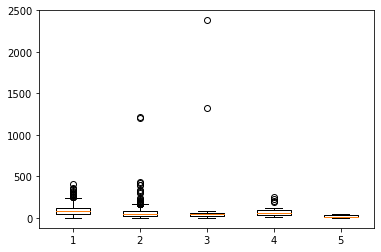

In [92]:
plt.figure()

plt.boxplot((one_bed, two_bed, three_bed, four_bed, studio))

plt.show()

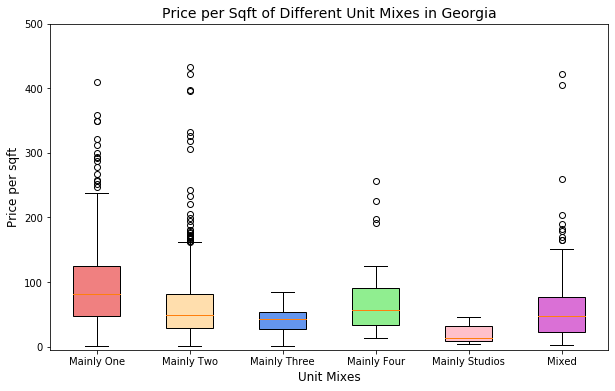

In [253]:
plt.figure(figsize = (10,6))

box = plt.boxplot((one_bed, two_bed, three_bed, four_bed, studio, mixed_bed),
           labels = (('Mainly One', 'Mainly Two', 'Mainly Three', 'Mainly Four', 'Mainly Studios', 'Mixed')), patch_artist = True)

colors = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid', 'lavender']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylim((-5,500))

plt.title('Price per Sqft of Different Unit Mixes in Georgia', fontsize = 14)
plt.ylabel('Price per sqft', fontsize = 12)
plt.xlabel('Unit Mixes', fontsize = 12)

plt.show()

In [126]:
units_mixed = pd.DataFrame(list(zip(georgia.percent_1,georgia.percent_2, georgia.percent_3, georgia.percent_4, georgia.percent_studio, georgia.unit_mix, georgia.Price_per_sqft)), 
                           columns = ['One Bedroom', 'Two Bedroom', 'Three Bedroom', 'Four Bedroom', 'Studio', 'unit_mix', 'Price per sqft'])
units_mixed.head(3)


,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Studio,unit_mix,Price per sqft
0,0.357143,0.466667,0.17619,0.0,0.000000,Mainly 2,180.16
1,0.357143,0.466667,0.17619,0.0,0.000000,Mainly 2,142.98
2,0.387597,0.000000,0.00000,0.0,0.612403,Mainly Studio,4.62


In [157]:
group_mix = georgia.groupby('unit_mix')['Price_per_sqft'].mean()
mix_labels = ['Mainly 1', 'Mainly 2','Mainly 3','Mainly 4','Mainly Studio', 'Mixed']
treemap_mix = pd.DataFrame(list(zip(mix_labels, group_mix)), columns = ['Category', 'Price_per_sqft'])
treemap_mix['Price_per_sqft']

0     93.884656
1     62.781218
2    114.832500
3     82.325500
4     20.910000
5     68.201675
Name: Price_per_sqft, dtype: float64

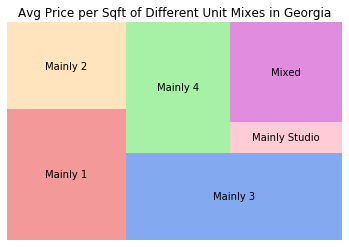

In [263]:
squarify.plot(sizes = treemap_mix['Price_per_sqft'], label = treemap_mix['Category'], 
              alpha=.8, color = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid'])
plt.title('Avg Price per Sqft of Different Unit Mixes in Georgia')
plt.axis('off')
plt.show()


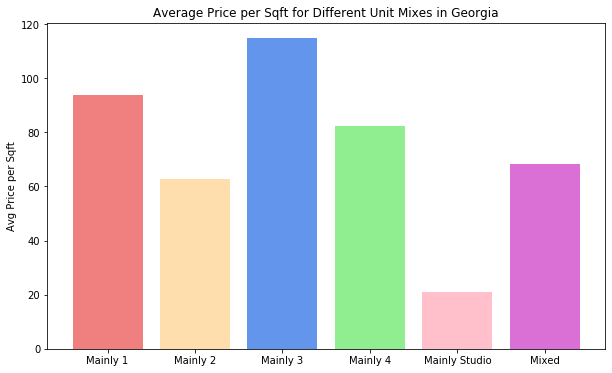

In [187]:
plt.figure(figsize = (10,6))

plt.bar(treemap_mix['Category'], treemap_mix['Price_per_sqft'], 
        color = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid'])

plt.title("Average Price per Sqft for Different Unit Mixes in Georgia")
plt.ylabel("Avg Price per Sqft")

plt.show()

In [217]:
florida = pd.read_csv('Florida_all_data.csv')

In [218]:
florida = florida[['SCAPN', 'PropID', 'City', 'County', 'Zip', 'Num_units', 'Num_studio', 'Num_1_bed', 'Num_2_bed','Num_3_bed', 'Num_4_bed', 'Price_per_sqft']]

In [219]:
florida.insert(6, 'percent_1', florida['Num_1_bed']/florida['Num_units'], True)
florida.insert(6, 'percent_2', florida['Num_2_bed']/florida['Num_units'], True)
florida.insert(6, 'percent_3', florida['Num_3_bed']/florida['Num_units'], True)
florida.insert(6, 'percent_4', florida['Num_4_bed']/florida['Num_units'], True)
florida.insert(6, 'percent_studio', florida['Num_studio']/florida['Num_units'], True)

In [220]:
florida.head(2)

,SCAPN,PropID,City,County,Zip,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft
0,FL Pinellas 34-29-15-50256-001-0010,P2828,Largo,Pinellas,337703328,123,NaN,NaN,NaN,NaN,1.000000,NaN,123.0,NaN,NaN,NaN,NaN
1,FL Pinellas 24-31-16-29718-013-0150,P2829,Saint Petersburg,Pinellas,337138934,251,0.278884,NaN,0.119522,0.231076,0.370518,70.0,93.0,58.0,30.0,NaN,NaN


In [221]:
florida = florida[florida.Price_per_sqft > 0]
florida = florida[florida.Price_per_sqft < 5000]

florida.count()

SCAPN             2920
PropID            2920
City              2920
County            2920
Zip               2920
Num_units         2920
percent_studio     363
percent_4          211
percent_3         1768
percent_2         2621
percent_1         2481
Num_studio         363
Num_1_bed         2481
Num_2_bed         2621
Num_3_bed         1768
Num_4_bed          211
Price_per_sqft    2920
dtype: int64

In [222]:
florida['percent_4'].fillna(0, inplace=True)
florida['percent_3'].fillna(0, inplace=True)
florida['percent_2'].fillna(0, inplace=True)
florida['percent_3'].fillna(0, inplace=True)
florida['percent_studio'].fillna(0, inplace=True)
florida = florida.reset_index(drop=True)

florida.head(3)

,SCAPN,PropID,City,County,Zip,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft
0,FL Pinellas 19-31-17-74466-011-0090,P2837,Saint Petersburg,Pinellas,337014242,309,0.003236,0.0,0.000000,0.291262,0.705502,1.0,218.0,90.0,NaN,NaN,277.96
1,FL Pinellas 19-31-17-78428-002-0010,P2838,Saint Petersburg,Pinellas,337013294,326,0.110429,0.0,0.021472,0.380368,0.487730,36.0,159.0,124.0,7.0,NaN,152.81
2,FL Pinellas 19-31-17-78428-002-0010,P2838,Saint Petersburg,Pinellas,337013294,326,0.110429,0.0,0.021472,0.380368,0.487730,36.0,159.0,124.0,7.0,NaN,56.01


In [223]:
def iscategory(unit_mix):  
    if florida.percent_1[unit_mix] > 0.45:
        return 'Mainly 1'
    elif florida.percent_2[unit_mix] > 0.45:
        return 'Mainly 2'
    elif florida.percent_3[unit_mix] > 0.45:
        return 'Mainly 3'
    elif florida.percent_4[unit_mix] > 0.45:
        return 'Mainly 4'
    elif florida.percent_studio[unit_mix] > 0.45:
        return 'Mainly Studio'
    else:
        return 'Mixed'

In [224]:
florida['unit_mix'] = np.arange(len(florida))
florida['unit_mix'] = florida['unit_mix'].apply(iscategory)


In [247]:
onebed = florida.Price_per_sqft[florida.unit_mix == 'Mainly 1']
twobed = florida.Price_per_sqft[florida.unit_mix == 'Mainly 2']
threebed = florida.Price_per_sqft[florida.unit_mix == 'Mainly 3']
fourbed = florida.Price_per_sqft[florida.unit_mix == 'Mainly 4']
stud = florida.Price_per_sqft[florida.unit_mix == 'Mainly Studio']
mixed = florida.Price_per_sqft[florida.unit_mix == 'Mixed']

In [226]:
florida.groupby('unit_mix')['Price_per_sqft'].mean()

unit_mix
Mainly 1         110.402508
Mainly 2          90.081222
Mainly 3          58.325455
Mainly 4         114.434468
Mainly Studio    120.697692
Mixed            345.040747
Name: Price_per_sqft, dtype: float64

In [227]:
florida.groupby('unit_mix')['Price_per_sqft'].std()

unit_mix
Mainly 1         204.804367
Mainly 2         100.314099
Mainly 3          43.788497
Mainly 4          68.132722
Mainly Studio    109.411725
Mixed            697.394843
Name: Price_per_sqft, dtype: float64

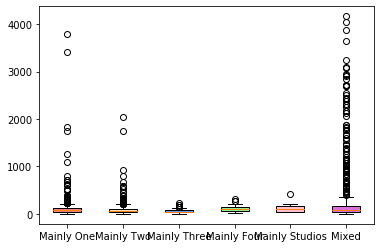

In [248]:
plt.figure()

box = plt.boxplot((onebed, twobed, threebed, fourbed, stud, mixed),
           labels = (('Mainly One', 'Mainly Two', 'Mainly Three', 'Mainly Four', 'Mainly Studios', 'Mixed')), patch_artist = True)

colors = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid', 'lavender']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

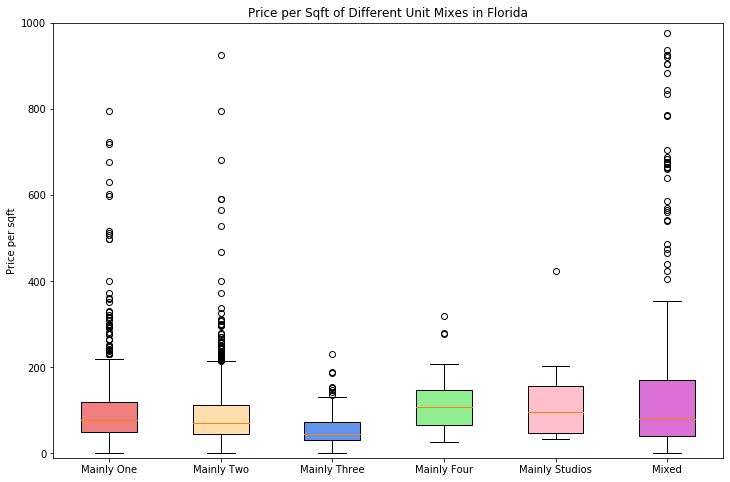

In [249]:
plt.figure(figsize = (12,8))

box = plt.boxplot((onebed, twobed, threebed, fourbed, stud, mixed),
           labels = (('Mainly One', 'Mainly Two', 'Mainly Three', 'Mainly Four', 'Mainly Studios', 'Mixed')), patch_artist = True)

colors = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid', 'lavender']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.ylim((-10,1000))
plt.title("Price per Sqft of Different Unit Mixes in Florida")
plt.ylabel("Price per sqft")
    
plt.show()

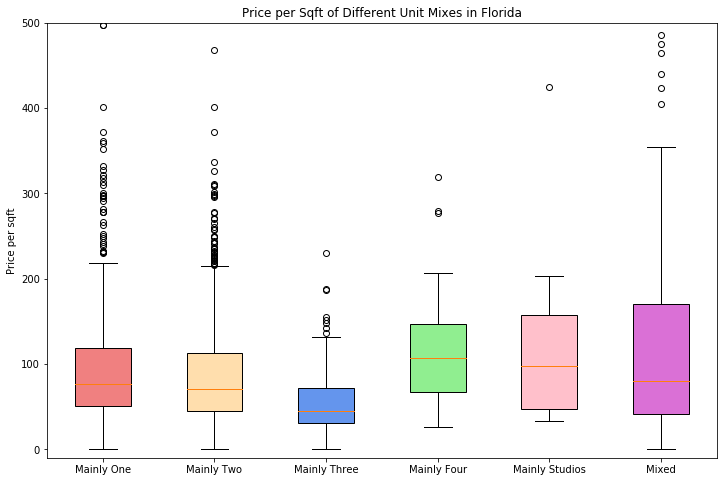

In [251]:
plt.figure(figsize = (12,8))

box = plt.boxplot((onebed, twobed, threebed, fourbed, stud, mixed),
           labels = (('Mainly One', 'Mainly Two', 'Mainly Three', 'Mainly Four', 'Mainly Studios', 'Mixed')), patch_artist = True)

colors = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid', 'lavender']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.ylim((-10,500))
plt.title("Price per Sqft of Different Unit Mixes in Florida")
plt.ylabel("Price per sqft")
    
plt.show()

In [216]:
texas = pd.read_csv('Texas_all_data.csv')
texas = texas[['SCAPN', 'PropID', 'City', 'County', 'Zip', 'Num_units', 'Num_studio', 'Num_1_bed', 'Num_2_bed','Num_3_bed', 'Num_4_bed', 'Price_per_sqft']]

In [230]:
texas.insert(6, 'percent_1', texas['Num_1_bed']/texas['Num_units'], True)
texas.insert(6, 'percent_2', texas['Num_2_bed']/texas['Num_units'], True)
texas.insert(6, 'percent_3', texas['Num_3_bed']/texas['Num_units'], True)
texas.insert(6, 'percent_4', texas['Num_4_bed']/texas['Num_units'], True)
texas.insert(6, 'percent_studio', texas['Num_studio']/texas['Num_units'], True)

texas = texas[texas.Price_per_sqft > 0]
texas = texas[texas.Price_per_sqft < 5000]

texas['percent_4'].fillna(0, inplace=True)
texas['percent_3'].fillna(0, inplace=True)
texas['percent_2'].fillna(0, inplace=True)
texas['percent_3'].fillna(0, inplace=True)
texas['percent_studio'].fillna(0, inplace=True)
texas = texas.reset_index(drop=True)

texas.head(3)

,SCAPN,PropID,City,County,Zip,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft
0,TX Bexar 00273-002-0011,P10570,San Antonio,Bexar,78207,102,0.0,0.000000,0.068627,0.215686,0.715686,NaN,73.0,22.0,7.0,NaN,175.00
1,TX Lubbock R124322,P10595,Lubbock,Lubbock,79414,102,0.0,0.000000,0.098039,0.666667,0.235294,NaN,24.0,68.0,10.0,NaN,37.04
2,TX Kaufman 7663,P10602,Terrell,Kaufman,751604831,107,0.0,0.009346,0.261682,0.373832,0.355140,NaN,38.0,40.0,28.0,1.0,51.84


In [231]:
def iscategory_(unit_mix):  
    if texas.percent_1[unit_mix] > 0.45:
        return 'Mainly 1'
    elif texas.percent_2[unit_mix] > 0.45:
        return 'Mainly 2'
    elif texas.percent_3[unit_mix] > 0.45:
        return 'Mainly 3'
    elif texas.percent_4[unit_mix] > 0.45:
        return 'Mainly 4'
    elif texas.percent_studio[unit_mix] > 0.45:
        return 'Mainly Studio'
    else:
        return 'Mixed'

In [241]:
texas['unit_mix'] = np.arange(len(texas))
texas['unit_mix'] = texas['unit_mix'].apply(iscategory_)

oneb = texas.Price_per_sqft[texas.unit_mix == 'Mainly 1']
twob = texas.Price_per_sqft[texas.unit_mix == 'Mainly 2']
threeb = texas.Price_per_sqft[texas.unit_mix == 'Mainly 3']
fourb = texas.Price_per_sqft[texas.unit_mix == 'Mainly 4']
studiob = texas.Price_per_sqft[texas.unit_mix == 'Mainly Studio']
mixedb = texas.Price_per_sqft[texas.unit_mix == 'Mixed']

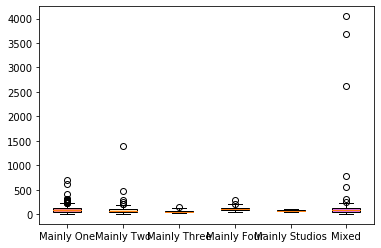

In [242]:
plt.figure()

box = plt.boxplot((oneb, twob, threeb, fourb, studiob, mixedb),
           labels = (('Mainly One', 'Mainly Two', 'Mainly Three', 'Mainly Four', 'Mainly Studios', 'Mixed')), patch_artist = True)

colors = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid', 'purple']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [243]:
texas.groupby('unit_mix')['Price_per_sqft'].mean()

unit_mix
Mainly 1          91.826087
Mainly 2          76.506750
Mainly 3          57.700000
Mainly 4         120.330000
Mainly Studio     72.875000
Mixed            157.672848
Name: Price_per_sqft, dtype: float64

In [244]:
texas.groupby('unit_mix')['Price_per_sqft'].std()

unit_mix
Mainly 1          54.487321
Mainly 2          72.230212
Mainly 3          39.211135
Mainly 4          61.377918
Mainly Studio     44.554798
Mixed            474.343076
Name: Price_per_sqft, dtype: float64

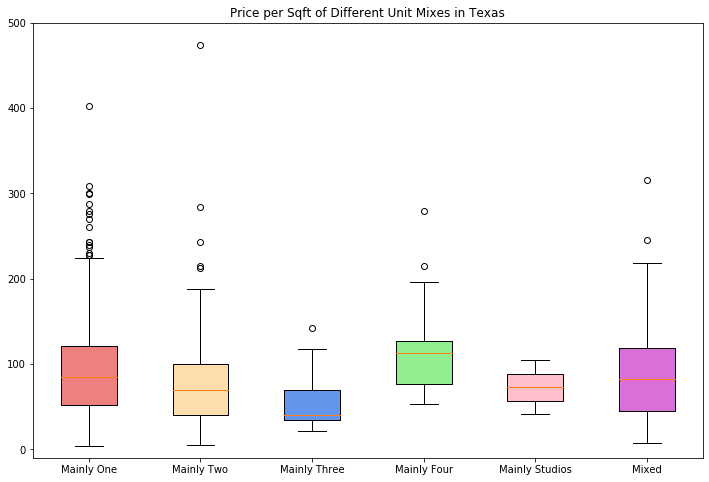

In [262]:
plt.figure(figsize = (12,8))

box = plt.boxplot((oneb, twob, threeb, fourb, studiob, mixedb),
           labels = (('Mainly One', 'Mainly Two', 'Mainly Three', 'Mainly Four', 'Mainly Studios', 'Mixed')), patch_artist = True)

colors = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid', 'lavender']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.ylim((-10,500))
plt.title('Price per Sqft of Different Unit Mixes in Texas')
    
plt.show()

In [254]:
northcar = pd.read_csv('North_Carolina_all_data.csv')
northcar = northcar[['SCAPN', 'PropID', 'City', 'County', 'Zip', 'Num_units', 'Num_studio', 'Num_1_bed', 'Num_2_bed','Num_3_bed', 'Num_4_bed', 'Price_per_sqft']]

In [255]:
northcar.insert(6, 'percent_1', northcar['Num_1_bed']/northcar['Num_units'], True)
northcar.insert(6, 'percent_2', northcar['Num_2_bed']/northcar['Num_units'], True)
northcar.insert(6, 'percent_3', northcar['Num_3_bed']/northcar['Num_units'], True)
northcar.insert(6, 'percent_4', northcar['Num_4_bed']/northcar['Num_units'], True)
northcar.insert(6, 'percent_studio', northcar['Num_studio']/northcar['Num_units'], True)

northcar = northcar[northcar.Price_per_sqft > 0]
northcar = northcar[northcar.Price_per_sqft < 5000]

northcar['percent_4'].fillna(0, inplace=True)
northcar['percent_3'].fillna(0, inplace=True)
northcar['percent_2'].fillna(0, inplace=True)
northcar['percent_3'].fillna(0, inplace=True)
northcar['percent_studio'].fillna(0, inplace=True)
northcar = northcar.reset_index(drop=True)

northcar.head(3)

,SCAPN,PropID,City,County,Zip,Num_units,percent_studio,percent_4,percent_3,percent_2,percent_1,Num_studio,Num_1_bed,Num_2_bed,Num_3_bed,Num_4_bed,Price_per_sqft
0,NC Forsyth 6835-56-7348,P8145,Winston Salem,Forsyth,271014416,108,0.0,0.0,0.166667,0.462963,0.37037,NaN,40.0,50.0,18.0,NaN,44.18
1,NC Mecklenburg 078-062-01,P8149,Charlotte,Mecklenburg,28202,120,0.0,0.0,0.000000,0.600000,0.40000,NaN,48.0,72.0,NaN,NaN,182.58
2,NC Mecklenburg 078-062-01,P8149,Charlotte,Mecklenburg,28202,120,0.0,0.0,0.000000,0.600000,0.40000,NaN,48.0,72.0,NaN,NaN,142.45


In [256]:
def is__category(unit_mix):  
    if northcar.percent_1[unit_mix] > 0.45:
        return 'Mainly 1'
    elif northcar.percent_2[unit_mix] > 0.45:
        return 'Mainly 2'
    elif northcar.percent_3[unit_mix] > 0.45:
        return 'Mainly 3'
    elif northcar.percent_4[unit_mix] > 0.45:
        return 'Mainly 4'
    elif northcar.percent_studio[unit_mix] > 0.45:
        return 'Mainly Studio'
    else:
        return 'Mixed'

In [258]:
northcar['unit_mix'] = np.arange(len(northcar))
northcar['unit_mix'] = northcar['unit_mix'].apply(is__category)

north_one = northcar.Price_per_sqft[northcar.unit_mix == 'Mainly 1']
north_two = northcar.Price_per_sqft[northcar.unit_mix == 'Mainly 2']
north_three = northcar.Price_per_sqft[northcar.unit_mix == 'Mainly 3']
north_four = northcar.Price_per_sqft[northcar.unit_mix == 'Mainly 4']
north_studio = northcar.Price_per_sqft[northcar.unit_mix == 'Mainly Studio']
north_mixed = northcar.Price_per_sqft[northcar.unit_mix == 'Mixed']

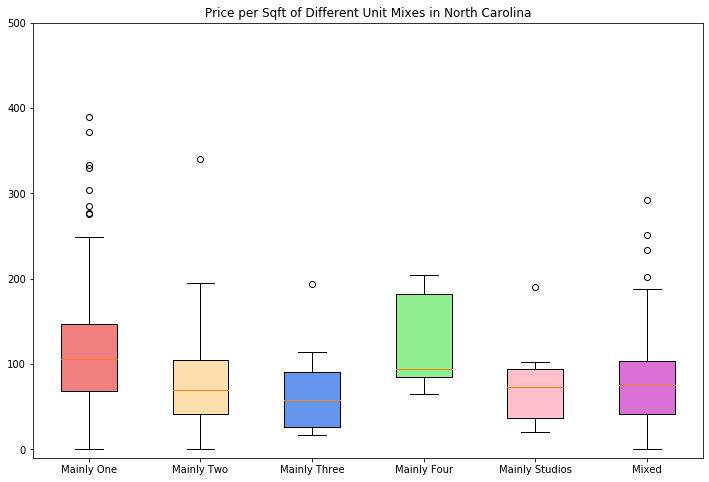

In [261]:
plt.figure(figsize = (12,8))

box = plt.boxplot((north_one, north_two, north_three, north_four, north_studio, north_mixed),
           labels = (('Mainly One', 'Mainly Two', 'Mainly Three', 'Mainly Four', 'Mainly Studios', 'Mixed')), patch_artist = True)

colors = ['lightcoral', 'navajowhite', 'cornflowerblue', 'lightgreen', 'pink', 'orchid', 'lavender']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.ylim((-10,500))
plt.title('Price per Sqft of Different Unit Mixes in North Carolina')

    
plt.show()

In [264]:
northcar.groupby('unit_mix')['Price_per_sqft'].mean()

unit_mix
Mainly 1         115.449262
Mainly 2          76.543375
Mainly 3          64.850000
Mainly 4         121.685556
Mainly Studio     77.981429
Mixed            106.523934
Name: Price_per_sqft, dtype: float64

In [265]:
texas.groupby('unit_mix')['Price_per_sqft'].mean()

unit_mix
Mainly 1          91.826087
Mainly 2          76.506750
Mainly 3          57.700000
Mainly 4         120.330000
Mainly Studio     72.875000
Mixed            157.672848
Name: Price_per_sqft, dtype: float64

In [266]:
florida.groupby('unit_mix')['Price_per_sqft'].mean()

unit_mix
Mainly 1         110.402508
Mainly 2          90.081222
Mainly 3          58.325455
Mainly 4         114.434468
Mainly Studio    120.697692
Mixed            345.040747
Name: Price_per_sqft, dtype: float64

In [267]:
georgia.groupby('unit_mix')['Price_per_sqft'].mean()

unit_mix
Mainly 1          93.884656
Mainly 2          62.781218
Mainly 3         114.832500
Mainly 4          82.325500
Mainly Studio     20.910000
Mixed             68.201675
Name: Price_per_sqft, dtype: float64